<hr>

<h2>Exercices 1.1</h2>

<hr>

<b>4.</b> Design an algorithm for computing $\left \lfloor \sqrt{n} \right \rfloor$ for any positive integer $n$. Besides assignment and comparison, your algorithm may only use the four basic arithmetical operations.

In [1]:
def floor_sqrt(n):
    
    if n < 0:
        raise ValueError("Cannot compute the square root of a negative number.")
    
    if n == 0 or n == 1:
        return n
    
    low, high = 1, n
    result = 0
    
    while low <= high:
        
        mid = (low + high) // 2
        mid_squared = mid * mid
        
        if mid_squared == n:
            return mid
            
        elif mid_squared < n:
            low = mid + 1
            result = mid
            
        else:
            high = mid - 1
    
    return result


floor_sqrt(26)

5

<hr>

<b>5.</b> Design an algorithm to find all the common elements in two sorted lists of
numbers. For example, for the lists 2, 5, 5, 5 and 2, 2, 3, 5, 5, 7, the output
should be 2, 5, 5. What is the maximum number of comparisons your algorithm
makes if the lengths of the two given lists are m and n, respectively?

In [2]:
def common_elements(va,vb):

    res  = []
    
    if len(va) == 0 or len(vb) == 0:
        
        return res

    id = []

    for a in va:

        for j in range(0,len(vb)):

            if a == vb[j] and j not in id:

                id  += [j]
                res += [a]
                break
    return res
            
a = [2,5,5,5]  
b = [2,2,3,5,5,7]

common_elements(a,b) # Returns [2, 5, 5]

[2, 5, 5]


$$ n + n + \dots + n \ ( m \ \text{ times } ) \Rightarrow \text{Iterations}=m \times n$$

<hr>

<b>6.a.</b> Find $\text{gcd}(31415, 14142)$ by applying Euclid’s algorithm.

In [3]:
def euclid(m,n):
    
    n_iter = 0
    
    while n != 0:
    
        r       = m % n
        m       = n
        n       = r
        n_iter += 1

    return m, n_iter
            
euclid(31415,14142)[0] # Returns 1, iterations 10

1

<hr>
<b>6.b.</b> Estimate how many times faster it will be to find gcd$(31415, 14142)$ by Euclid’s algorithm compared with the algorithm based on checking consecutive integers from min$\{m, n\}$ down to gcd$(m, n)$.

In [4]:
def checagem_de_inteiro_consec(m,n):

    t  = min(m,n)
    it = 0
    
    while True:
        it += 1
        if m % t == 0 and n % t == 0:
            print('Iterations:',it)
            return t

        else:
            t -= 1

checagem_de_inteiro_consec(31415,14142) # Retorna 1, Total de iterações 14142

Iterations: 14142


1

The difference in efficiency can be estimated by the ratio of the complexities of the algorithms:
<ul>
    <li>Euclidean Algorithm: $O(\log(\min(m,n)))$;</li>
    <li>Consecutive Integer Checking Algorithm: $O(\min(m,n))$.</li>
</ul>

For the values $m=31415$ and $n=14142$:
<ul>
    <li>$O(\log_2(\min(31415,14142))) \approx 14$;</li>
    <li>$O(\min(31415,14142))$ results in 14142 iterations in the worst case.</li>
</ul>

The ratio between the complexities of the algorithms can be seen as a direct comparison of their terms:

$$\frac{O(min⁡(m,n))}{O(log⁡(min⁡(m,n)))} \approx \frac{14142}{14} \approx 1000$$

This means that, for the given values, the Consecutive Integer Checking Algorithm is approximately 1000 times slower than the Euclidean Algorithm.


<hr>

<b>7.</b> Prove the equality gcd$(m, n) =$ gcd$(n, m \ \text{mod} \ n)$ for every pair of positive
integers $m$ and $n$.

<b>Pf.:</b>


Suponha que, $$ d = \text{mdc}(m,n).$$

Por definição, $$ \exists k,l \in \mathbb{Z} : m=dk, n=dl. \tag{1}$$

Partindo de $m \ \text{mod} \ n$, $$ r = m \ \text{mod} \ n \Rightarrow m = qn + r. \tag{2}$$

Substituindo (1) em (2) : $$ m = qn + r \Rightarrow (dk) = q(dl) + r\Rightarrow r = dk - qdl \Rightarrow r = d(k-ql).$$

Portanto, $d$ divide $r$, i.e., $d$ divide $m \ \text{mod} \ n.$ 

Por outro lado, seja

$$ d' = \text{mdc}(n, m \ \text{mod} \ n).$$

Por definição, $$ d' | n  \ \text{e} \  d'|(m \ \text{mod}\ n).$$

Sabe-se que $ m = qn + (m \ \text{mod}\ n)$. Uma vez que $d'|n$ e $d'|(m \ \text{mod}\ n)$, $d'$ divide qualquer combinação linear de $n$ e $m \ \text{mod}\ n$, incluindo $m$. <b>Logo, $d'$ é um divisor comum entre $m$ e $n$</b>.

Como

$$ d=\text{mdc}(m,n) \Rightarrow d' \leq d,$$

e $d$ é divisor comum entre $n$ e $m \ \text{mod}\ n \Rightarrow d \leq d'.$ <b>Assim, $d=d'$</b>.

Portanto, gcd$(m, n) =$ gcd$(n, m \ \text{mod} \ n)$
$\blacksquare$

<hr>
<b>9.a.</b> What is the minimum number of divisions made by Euclid’s algorithm
among all inputs $1 \leq m$, $n \leq 10$?
<br><br>
 The minimum number of divisions made by Euclid’s algorithm occurs when $m$ is a multiple of $n$. In this case, the algorithm completes in exactly one division.

<hr>

<b>9.b.</b> What is the maximum number of divisions made by Euclid’s algorithm
among all inputs $1 \leq m$, $n \leq 10$?


In [5]:
N = []

for i in range(1,10+1):
    
    for j in range(1,i+1):

        N.append(euclid(i,j)[1])
        
print(max(N)) # Maximum number of divisions | Returns 4

4


<hr>
<b>10.a</b> Euclid’s algorithm, as presented in Euclid’s treatise, uses subtractions
rather than integer divisions. Write pseudocode for this version of Euclid’s
algorithm.

```python
while a ≠ b:
    if a > b:
        a = a - b
    else:
        b = b - a

```

<hr>
<b>10.b</b> Euclid’s game (see [Bog]) starts with two unequal positive integers on the
board. Two players move in turn. On each move, a player has to write on
the board a positive number equal to the difference of two numbers already
on the board; this number must be new, i.e., different from all the numbers
already on the board. The player who cannot move loses the game. Should
you choose to move first or second in this game?

<br>
Ans.: you should generally prefer to move first in Euclid’s game. The reason is that as the game evolves, the first player often has more control over the initial set of moves and can force the opponent into less advantageous positions as the number of possible moves decreases. (This game is arealdy solved, given $a$ and $b$ where $a=kb$ the first player wins).

<hr>
<b>11.a The extended Euclid’s algorithm</b> determines not only the greatest common
divisor $d$ of two positive integers $m$ and $n$ but also integers (not necessarily
positive) $x$ and $y$, such that $mx + ny = d$. Look up a description of the extended Euclid’s algorithm and implement it in the language of your choice.

(<a href="https://brilliant.org/wiki/extended-euclidean-algorithm/">Click to see reference</a>) The extended Euclidean algorithm is an algorithm to compute integers $x$ and $y$ such that

$$ax+by=\text{gcd}⁡(a,b)$$

given $a$ and $b$.

The existence of such integers is guaranteed by Bézout's lemma.

(Bézout's lemma) For nonzero integers $a$ and $b$, let $d$ be the greatest common divisor $d=\text{gcd}⁡(a,b)$. Then, there exist integers $x$ and $y$ such that

$$ax+by=d.$$

In [6]:
def extended_gcd(a,b):
    
    s = 0; old_s = 1
    t = 1; old_t = 0
    r = b; old_r = a

    while r != 0:
        
        div = old_r // r
        (old_r,r) = (r, old_r - div * r)
        (old_s,s) = (s, old_s - div * s)
        (old_t,t) = (t, old_t - div * t)
    
    print('Bézout coefficients (x,y):', (old_s, old_t))
    print('Greatest common divisor:', old_r)
    print('Quotients by the gcd:', (t,s))

    return old_s,old_t, old_r

<font color="gray"> <b>Example:</b></font> Find the value of $x$ and $y$ for the following equation: 
$$1432x+123211y=\text{gcd}(1432,123211). $$

In [7]:
extended_gcd(1432,123211)

Bézout coefficients (x,y): (-22973, 267)
Greatest common divisor: 1
Quotients by the gcd: (-1432, 123211)


(-22973, 267, 1)

<hr>
<b>11.b</b> Modify your program to find integer solutions to the Diophantine equation $ax + by = c$ with any set of integer coefficients $a$, $b$, and $c$.<br>
<a href='https://brilliant.org/wiki/bezouts-identity/'>(Click to see reference)</a>

In [8]:
def diophantine(a,b,c):

    x, y, d = extended_gcd(a,b)
    
    if c % d != 0:
        print("No solutions exist for the given coefficients.")
        return None
    
    k = c/d

    x = k*x
    y = k*y

    x_general = 'x = {} + k*{}'.format(x, b // d)
    y_general = 'y = {} - k*{}'.format(y, a // d)
    
    print('Particular solution (x0,y0) = ({},{})'.format(x,y))
    print('General solution:')
    print(x_general)
    print(y_general)
    
    return x, y

diophantine(1,10,5) # Example 1x+10y=5

Bézout coefficients (x,y): (1, 0)
Greatest common divisor: 1
Quotients by the gcd: (1, -10)
Particular solution (x0,y0) = (5.0,0.0)
General solution:
x = 5.0 + k*10
y = 0.0 - k*1


(5.0, 0.0)

In [9]:
# Integer solutions
def integer_sol(vk):
    px = []
    py = []
    for k in vk:
        px.append(5+k*10)
        py.append(0-k*1 )
    return px,py

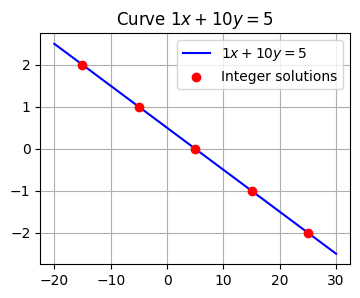

In [10]:
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(-20, 30, 400)
y = 5/10-x/10

pts = integer_sol([-2,-1,0,1,2])

plt.figure(figsize=(4, 3))
plt.plot(x, y, label='$1x+10y=5$', color='blue')
plt.scatter(pts[0],pts[1], color='red', zorder=5, label='Integer solutions')
plt.title('Curve $1x+10y=5$') 
plt.grid(True)  
plt.legend()  
plt.show() 

<hr>
<b>12. <i>Locker doors</i></b> There are $n$ lockers in a hallway, numbered sequentially from
$1$ to $n$. Initially, all the locker doors are closed. You make $n$ passes by the
lockers, each time starting with locker #1. On the ith pass, $i = 1, 2, \dots , n$, you
toggle the door of every ith locker: if the door is closed, you open it; if it is
open, you close it. After the last pass, which locker doors are open and which
are closed? How many of them are open?

Pattern:<br>
[0]_______ $\Rightarrow$ [1]<br> 
[0,0]_____ $\Rightarrow$ [1,1]____ $\Rightarrow$ [0,1]<br>
[0,0,0]___ $\Rightarrow$ [1,1,1]___ $\Rightarrow$ [1,0,1]____ $\Rightarrow$ [1,0,0]<br> 
[0,0,0,0]__ $\Rightarrow$ [1,1,1,1]_ $\Rightarrow$ [1,0,1,0]__ $\Rightarrow$ [1,0,0,0]__ $\Rightarrow$ [1,0,0,1]<br> 
[0,0,0,0,0] $\Rightarrow$ [1,1,1,1,1] $\Rightarrow$ [1,0,1,0,1]. $\Rightarrow$ [1,0,0,0,1] $\Rightarrow$ [1,0,0,1,1] $\Rightarrow$ [1,0,0,1,0] <br> 

The number of open doors is $\left \lfloor \sqrt{n} \right \rfloor$:

In [11]:
n      = 4 
n_open = floor_sqrt(n) 
n_clos = n - n_open

print('Número de portas abertas:' ,n_open)
print('Número de portas fechadas:',n_clos)

Número de portas abertas: 2
Número de portas fechadas: 2


In [12]:
def locker(n):

    closed = []
    opened = []
    loc    = [0]*n

    for k in range(1,n+1):
    
        for i in range(0,n):
            
            if (i+1) % k  == 0:

               if  loc[i] == 0:
                   loc[i] =  1
               else:
                   loc[i] =  0
    
    for i in range(0,len(loc)):

        if loc[i] == 0:
            closed.append(i+1)
        else:
            opened.append(i+1)
    
    print('Lockers:',loc)
    return closed, opened
    
n = 5
res = locker(n)
print('Opened lockers: {}. Closed lockers: {}.'.format(res[1],res[0]))

Lockers: [1, 0, 0, 1, 0]
Opened lockers: [1, 4]. Closed lockers: [2, 3, 5].


<hr>
<b>A1. (Additional)</b> Sieve of Erastosthenes.

In [13]:
from math import floor, sqrt

#Book sieve implementation
def sieve_book(n):

    A = list(range(2, n + 1))
    
    L = []
    
    for p in range(2,floor(sqrt(A[-1]))+1):
        
        if A[p] != 0:
            
            j = p*p
            
            while j <= n:
                
                A[j-2] = 0
                j      = j + p

    for Ai in A:

        if Ai != 0:

            L.append(Ai)
    
    return L

print(sieve_book(25)) # Returns [2, 3, 5, 7, 11, 13, 17, 19, 23]

# My ideia to sieve function. Of course isn't otimizes and do more loops than book solution
def sieve(n):

    v   = list(range(2,n+1))

    res = v

    for p in range(2,floor(sqrt(max(v)))+1):

        for vi in v:

            if vi % p == 0 and vi != p:

                res.remove(vi)
    return res

print(sieve(25)) # Returns [2, 3, 5, 7, 11, 13, 17, 19, 23]

[2, 3, 5, 7, 11, 13, 17, 19, 23]
[2, 3, 5, 7, 11, 13, 17, 19, 23]
